# Título do notebook

## TL;DR
Fazer uma descrição de 3 linhas do objetivo do notebook e conclusões presentes na análise.

## Objetivo

Descrever com clareza qual o objetivo desse notebook.

## Dados

Descrever a base de dados utilizada.

## Modelos (opcional)

Em caso de treinamento ou comparação de modelos, descrever os modelos considerados

## Conclusões
Listar **todas** as conclusões obtidas no notebook:
1. conclusão 1
2. conclusão 2
3. etc.


## Observações importantes:
1. Sempre organize o conteúdo utilizando células markdown e seções. Também utilize células de texto para escrever sua análise das figuras que forem geradas.
2. Lembre-se que essa primeira célula deve ter informação suficiente para entender o que foi feito e quais conclusões você chegou, sem ter que ler o notebook inteiro. Isso agiliza muito a busca por informações ao longo do projeto. Além disso, seu eu do futuro (ou novas pessoas que entrem no projeto) vai agradecer se o seu notebook estiver bem escrito e completo.

# Aqui é a primeira seção

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('../../../data/rafaelDB.csv')

In [3]:
# Definindo o Array dos Vetores
vetorClusters = np.zeros(df.shape[1])

##### Plot dos dados

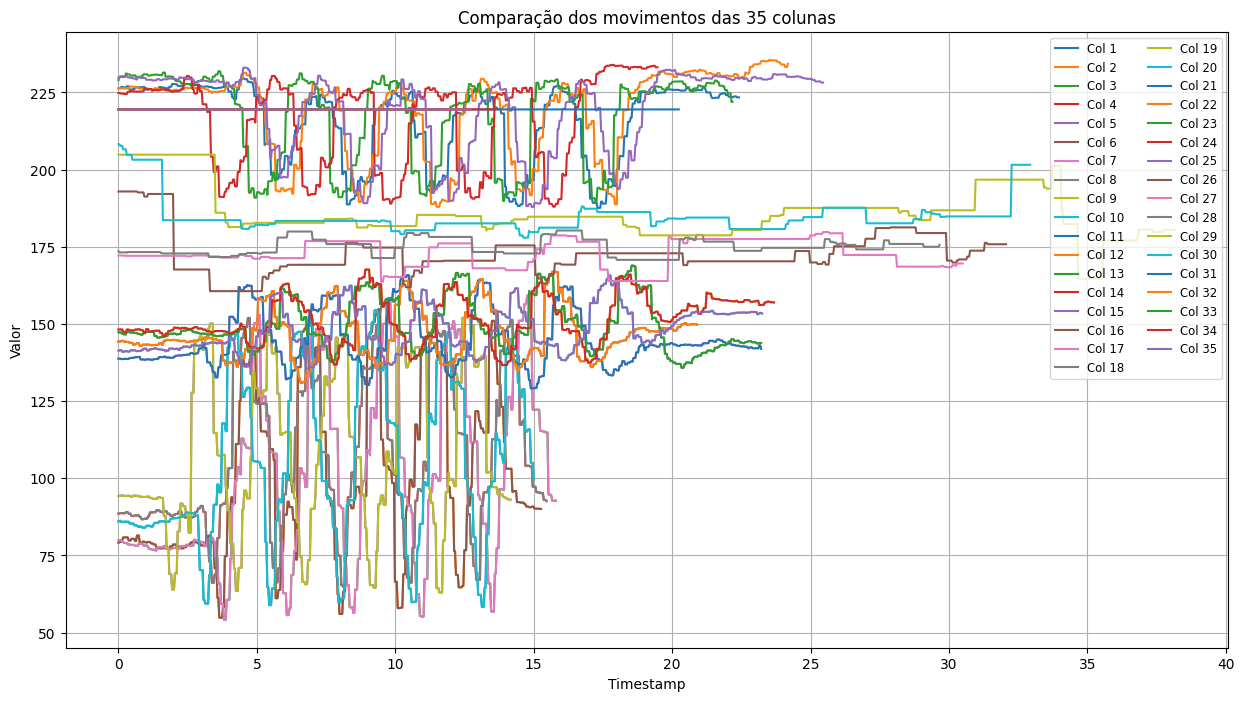

In [4]:
# Visualização dos dados.
# Suponha que df é seu DataFrame e a coluna 0 é timestamp
timestamp = df.iloc[:, 0]

plt.figure(figsize=(15, 8))

# Plota as colunas 1 a 35
for i in range(1, 36):
    plt.plot(timestamp, df.iloc[:, i], label=f'Col {i}')

plt.xlabel('Timestamp')
plt.ylabel('Valor')
plt.title('Comparação dos movimentos das 35 colunas')
plt.legend(loc='upper right', fontsize='small', ncol=2)
plt.grid(True)
plt.show()

#### Normalização dos dados 

In [5]:

# Separa timestamp e sensores
timestamp = df.iloc[:, 0]
dados = df.iloc[:, 1:]

# Conta valores não nulos (validos) por coluna (sensor)
valid_lengths = dados.notna().sum(axis=0)

# Identifica o menor tamanho válido
min_length = valid_lengths.min()

print(f"Menor tamanho válido: {min_length}")

# Corta todas as colunas para o menor tamanho
dados_cortados = dados.iloc[:min_length, :]

# Corta o timestamp também para manter alinhamento
timestamp_cortado = timestamp.iloc[:min_length]

# Reconstroi DataFrame final
df_final = pd.concat([timestamp_cortado.reset_index(drop=True), dados_cortados.reset_index(drop=True)], axis=1)

print(df_final.shape)
print(df_final.head())


Menor tamanho válido: 344
(344, 36)
   timestamp   Vol1Ex1   Vol1Ex2   Vol1Ex3   Vol1Ex4   Vol1Ex5   Vol2Ex1  \
0     0.0000  86.05160  79.04637  79.92158  88.55168  94.18597  144.2986   
1     0.0334  86.05160  79.42403  79.92158  88.55168  94.36861  144.2986   
2     0.0668  86.24536  79.42403  79.92158  88.72372  94.36861  144.2986   
3     0.1002  85.88944  79.42403  79.92158  88.72372  94.36861  144.4738   
4     0.1336  85.88944  79.89925  79.41667  88.72372  94.40106  144.5396   

    Vol2Ex2   Vol2Ex3   Vol2Ex4  ...   Vol6Ex1   Vol6Ex2   Vol6Ex3   Vol6Ex4  \
0  138.7671  147.3392  148.2097  ...  192.9248  172.1902  173.6004  204.8451   
1  138.7671  147.2379  148.2097  ...  192.9248  172.1767  173.1956  204.8451   
2  138.7671  147.2379  148.2097  ...  192.9248  172.1767  173.1956  204.8451   
3  138.6201  147.2379  148.2097  ...  192.9248  172.1767  173.1956  204.8451   
4  138.6201  146.8200  148.2097  ...  192.9248  172.1767  173.1956  204.8451   

    Vol6Ex5   Vol7Ex1   Vo

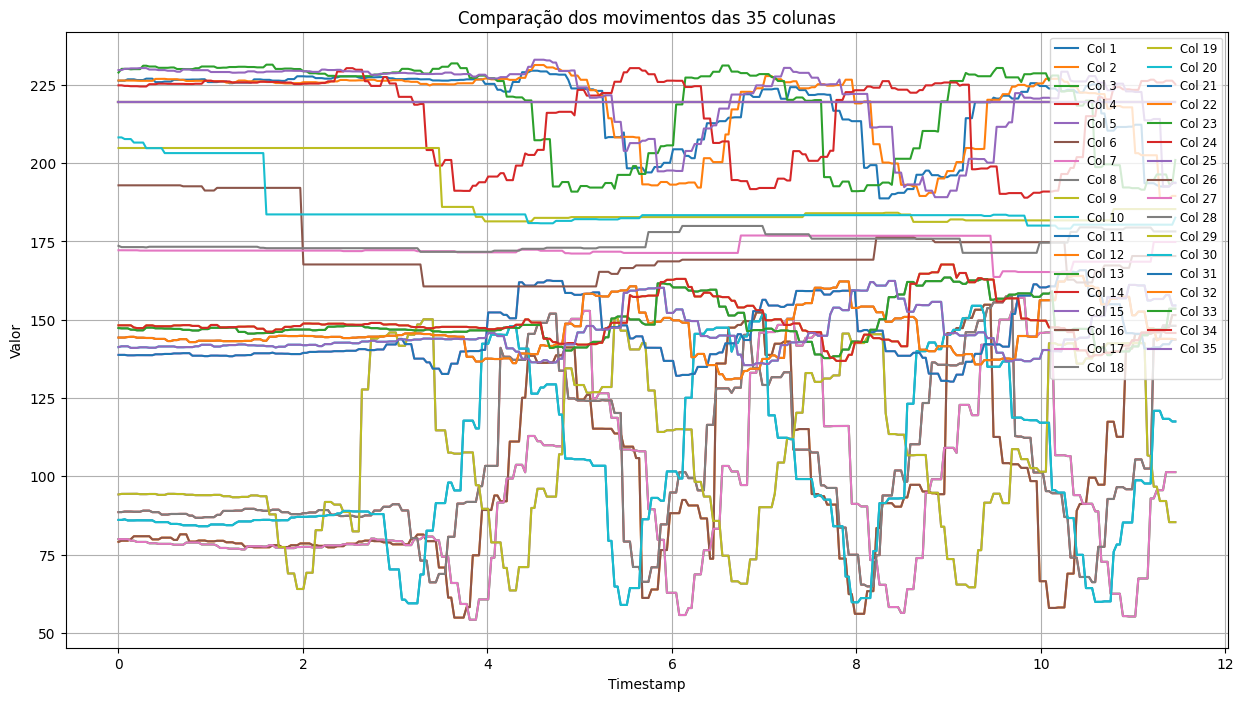

In [6]:
# Visualização dos dados.
# Suponha que df é seu DataFrame e a coluna 0 é timestamp
timestamp = df_final.iloc[:, 0]

plt.figure(figsize=(15, 8))

# Plota as colunas 1 a 35
for i in range(1, 36):
    plt.plot(timestamp, df_final.iloc[:, i], label=f'Col {i}')

plt.xlabel('Timestamp')
plt.ylabel('Valor')
plt.title('Comparação dos movimentos das 35 colunas')
plt.legend(loc='upper right', fontsize='small', ncol=2)
plt.grid(True)
plt.show()

In [7]:
#transpondo a matriz 
df = df_final.T
df

,0,1,2,3,4,5,6,7,8,9,...,334,335,336,337,338,339,340,341,342,343
timestamp,0.00000,0.03340,0.06680,0.10020,0.13360,0.16700,0.20040,0.23380,0.26720,0.30060,...,11.15560,11.18900,11.22240,11.25580,11.28920,11.32260,11.35600,11.38940,11.42280,11.45620
Vol1Ex1,86.05160,86.05160,86.24536,85.88944,85.88944,85.88944,85.92782,85.92782,85.92782,85.91203,...,97.68756,97.68756,120.90460,120.90460,120.90460,118.33170,118.33170,118.33170,117.49330,117.49330
Vol1Ex2,79.04637,79.42403,79.42403,79.42403,79.89925,80.83653,80.83653,80.83653,80.84084,80.84084,...,145.50160,145.50160,145.96920,145.96920,145.96920,147.59070,147.59070,147.59070,151.48710,151.48710
Vol1Ex3,79.92158,79.92158,79.92158,79.92158,79.41667,79.41667,79.02091,79.02091,79.02091,79.02091,...,67.34228,92.91782,92.91782,95.54456,95.54456,95.54456,101.32170,101.32170,101.32170,101.32170
Vol1Ex4,88.55168,88.55168,88.72372,88.72372,88.72372,88.67191,88.67191,88.67191,89.01524,89.01524,...,102.45950,102.45950,143.90810,143.90810,143.90810,148.16040,148.16040,148.04590,148.04590,148.04590
Vol1Ex5,94.18597,94.36861,94.36861,94.36861,94.40106,94.40106,94.40106,94.27642,94.27642,94.27642,...,106.65020,106.43960,96.67354,96.67354,92.09328,92.09328,92.09328,85.34341,85.34341,85.34341
Vol2Ex1,144.29860,144.29860,144.29860,144.47380,144.53960,144.53960,144.25480,144.25480,144.25480,144.16310,...,147.24300,147.24300,147.24300,143.39720,143.87740,143.87740,143.87740,143.87740,143.87740,143.67800
Vol2Ex2,138.76710,138.76710,138.76710,138.62010,138.62010,138.62010,138.68090,138.68090,138.68090,138.66650,...,140.78490,140.78490,141.18620,141.18620,141.18620,142.17100,142.17100,142.17100,143.61320,143.61320
Vol2Ex3,147.33920,147.23790,147.23790,147.23790,146.82000,146.82000,146.61340,146.61340,146.61340,147.48220,...,145.04020,147.01930,147.01930,147.01930,146.99450,146.99450,146.99450,153.51360,153.51360,153.51360
Vol2Ex4,148.20970,148.20970,148.20970,148.20970,148.20970,147.52790,147.31900,147.31900,147.31900,148.18790,...,145.90460,145.98290,145.98290,146.30200,146.30200,146.30200,145.76400,145.76400,145.76400,145.76400


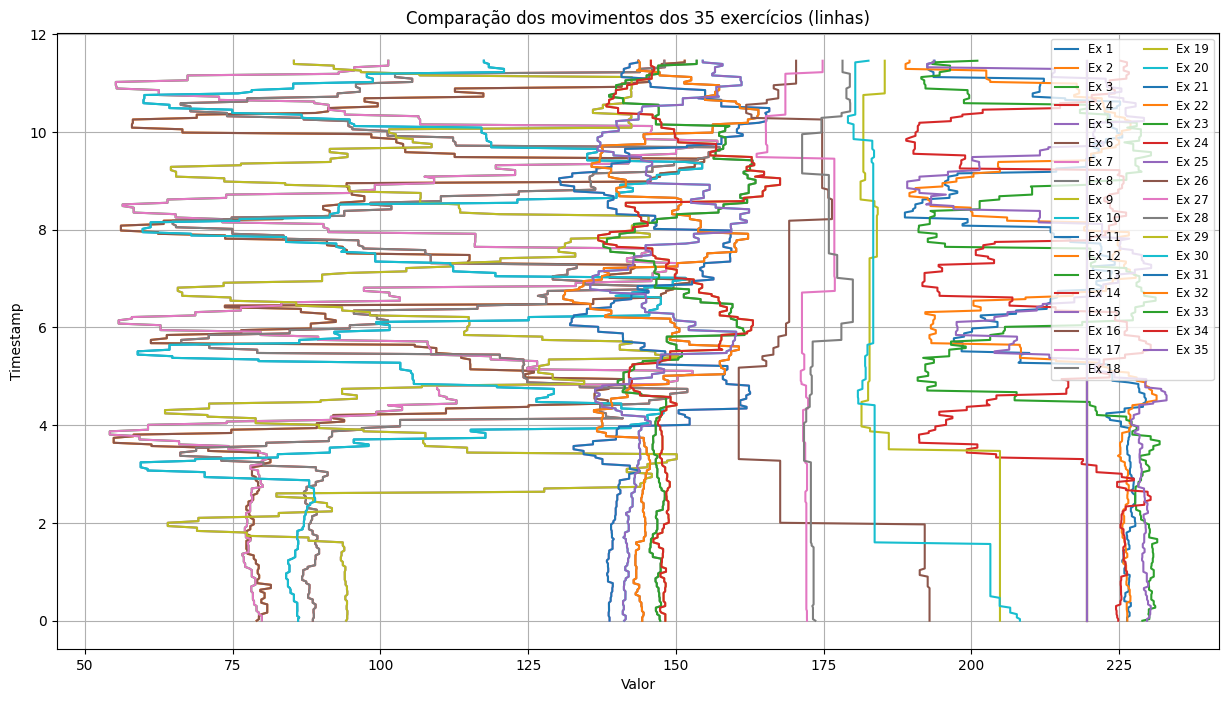

In [8]:
# O novo df tem timestamp como primeira linha (índice 0)
timestamp = df.iloc[0].values

plt.figure(figsize=(15, 8))

# As linhas 1 a 35 são os sensores (exercícios, colunas originais)
for i in range(1, 36):
    plt.plot(df.iloc[i].values, timestamp, label=f'Ex {i}')

plt.xlabel('Valor')
plt.ylabel('Timestamp')
plt.title('Comparação dos movimentos dos 35 exercícios (linhas)')
plt.legend(loc='upper right', fontsize='small', ncol=2)
plt.grid(True)
plt.show()

# Aplicando método e Medindo metricas de Clustering



## Aplicando metodo

In [15]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Considerando que df já foi definido como df_final.T

# 1. Separar os dados (excluindo a linha do timestamp)
X = df.iloc[1:].values  # shape: (n_exercicios, n_timestamps)

# 2. Escalar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Definir número de clusters
k = 4

# 4. Aplicar K-means
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)





In [17]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Suponha que 'df' seja o seu DataFrame com timestamp na linha 0
# e séries temporais da linha 1 em diante
# Exemplo: df = df_coluna

# 1. Separar os dados (removendo o timestamp)
X = df.iloc[1:].values

# 2. Normalizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Aplicar KMeans
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# 4. Calcular métricas de clusterização internas (sem y_true)
silhouette = silhouette_score(X_scaled, clusters)
calinski = calinski_harabasz_score(X_scaled, clusters)
davies = davies_bouldin_score(X_scaled, clusters)
inertia = kmeans.inertia_  # Soma das distâncias quadradas intra-cluster

# 5. Criar a tabela de métricas
metrics_table = pd.DataFrame([{
    'Modelo': 'KMeans',
    'n_clusters': k,
    'Silhouette Score': silhouette,
    'Calinski-Harabasz Score': calinski,
    'Davies-Bouldin Score': davies,
    'Inertia (Distortion)': inertia
}])

print(metrics_table)


   Modelo  n_clusters  Silhouette Score  Calinski-Harabasz Score  \
0  KMeans           4          0.627377               102.564398   

   Davies-Bouldin Score  Inertia (Distortion)  
0              0.464631           1105.203789  


# Conclusões

Aqui você deve listar todas as conclusões obtidas ao longo do notebook.
Pode copiar todo o conteúdo dessa seção lá na parte de conclusões do cabeçalho.